<a href="https://colab.research.google.com/github/ZygoOoade/math/blob/main/Dirac_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Approximation de la Fonction Delta de Dirac

 La fonction gaussienne qui suit est définie par :

$
f(x) = A \times e^{-B(x - \mu)^2}
$

où :
   - $A$ est l'amplitude du pic.
   - Le paramètre $B$ contrôle la largeur du pic (plus $ B $ est grand, plus le pic est étroit).
   - $ \mu $ est la position du centre du pic.

Dans le code suivant :
- $ A = 100 $ ou $ A = 10 000 $ (pour les pics de différentes hauteurs).
- $ B = 1000 $ (pour contrôler la largeur étroite des pics).
- $ \mu $ est donné par `pos` ou `large_spike_position`.

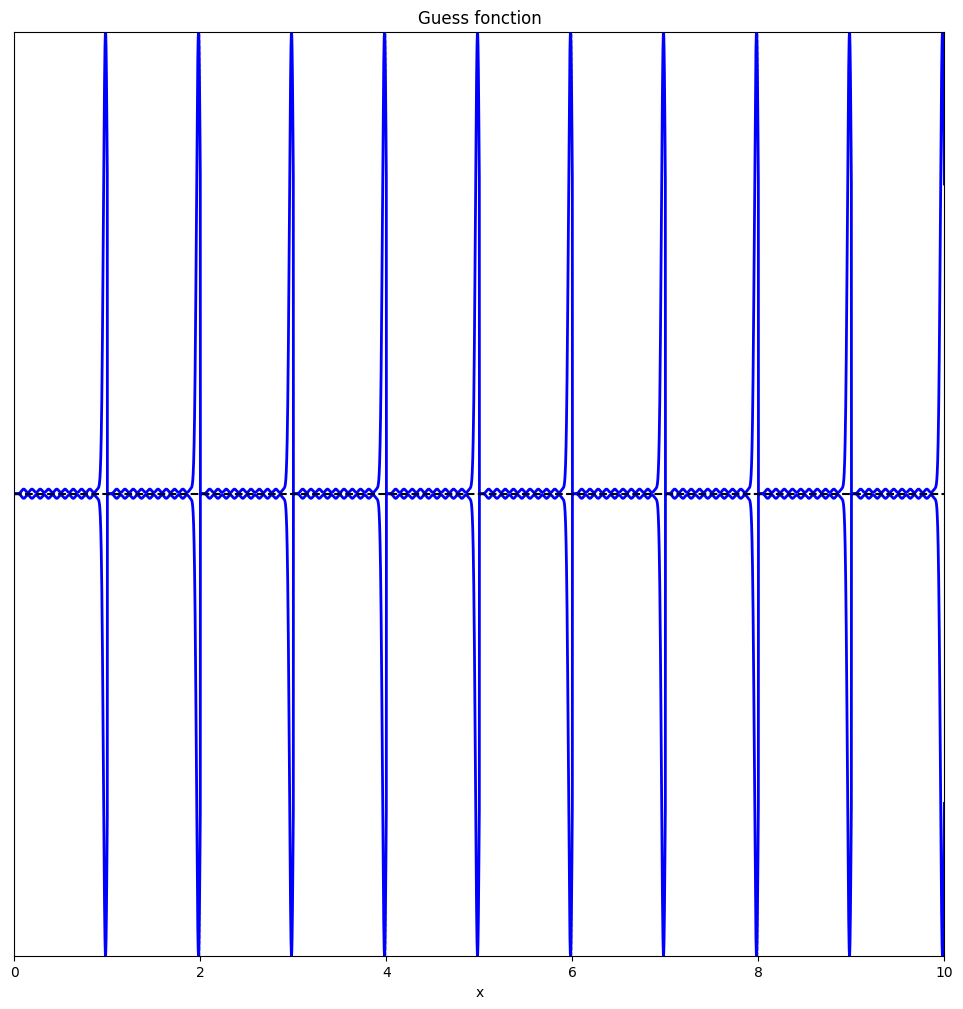

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the interval [0, 1] for a single period
x_period = np.linspace(0, 1, 1000)
y_period = np.zeros_like(x_period)

# Define the number of small spikes and their positions within [0.1, 0.9] range
num_small_spikes = 10
small_spike_positions = np.linspace(0.1, 0.9, num_small_spikes)

# Add small spikes
for pos in small_spike_positions:
    y_period += 100 * np.exp(-1000 * (x_period - pos) ** 2)  # Gaussian approximation of Dirac delta

# Add a large spike near the end at x = 0.98
large_spike_position = 0.98
y_period += 10000 * np.exp(-1000 * (x_period - large_spike_position) ** 2)  # Larger Gaussian spike

# Create the extended interval [0, 10]
x = np.linspace(0, 10, 10000)
y = np.zeros_like(x)

# Repeat the pattern for each period in [0, 10]
period_length = 1
num_periods = int(np.ceil((x[-1] - x[0]) / period_length))

for i in range(num_periods):
    x_periodic = x_period + i * period_length
    y_periodic = y_period

    # Add the periodic pattern to the overall y
    y += np.interp(x, x_periodic, y_periodic, left=0, right=0)

# Create the vertically symmetric y values for the bottom half
y_symmetric = 10000 - y

# Plot the function
plt.figure(figsize=(12, 12))

# Plot the top half (original)
plt.fill_between(x, y + 10000, 10000, color='white', alpha=0.3)
plt.plot(x, y + 10000, lw=2, color='blue')

# Plot the bottom half (vertically symmetric)
plt.fill_between(x, y_symmetric, color='white', alpha=0.3)
plt.plot(x, y_symmetric, lw=2, color='blue')

plt.ylim(0, 20000)  # Set y-axis limits from 0 to 20,000
plt.xlim(0, 10)  # Set x-axis limits from 0 to 10
plt.xlabel('x')
plt.yticks([])  # Hide y-axis ticks
plt.gca().set_yticklabels([])  # Hide y-axis labels
plt.title('Guess fonction')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line at y=10000 to separate the original and symmetric parts
plt.axhline(y=10000, color='black', linestyle='--')

plt.show()
